In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sales = pd.read_csv('/content/supermarket_sales.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
#memisahkan Tanggal dan Waktu menjadi bagian terkecil
sales['date'] = pd.to_datetime(sales['Date'])
sales['date'].dtype
type(sales['date'])
sales['date'] = pd.to_datetime(sales['date'])

sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour    #type(sales['Time'])

sales['Hour'].unique()

sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [ ]:
#Hasil akhir data yang telah di pre process
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10


In [ ]:
import plotly.graph_objects as go
labels= ['Female','male']
values  = [501,499]
colors = ['Gold', 'MediumTurquoise']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker_colors=colors)], layout_title_text="Difference in the number of purchases between women and men with the percentage of the pie chart")
fig.show()

In [ ]:
import plotly.express as px

fig = px.box(sales, x="City", y="Rating", color="City",notched=True, title="Rating Market City")
fig.show()

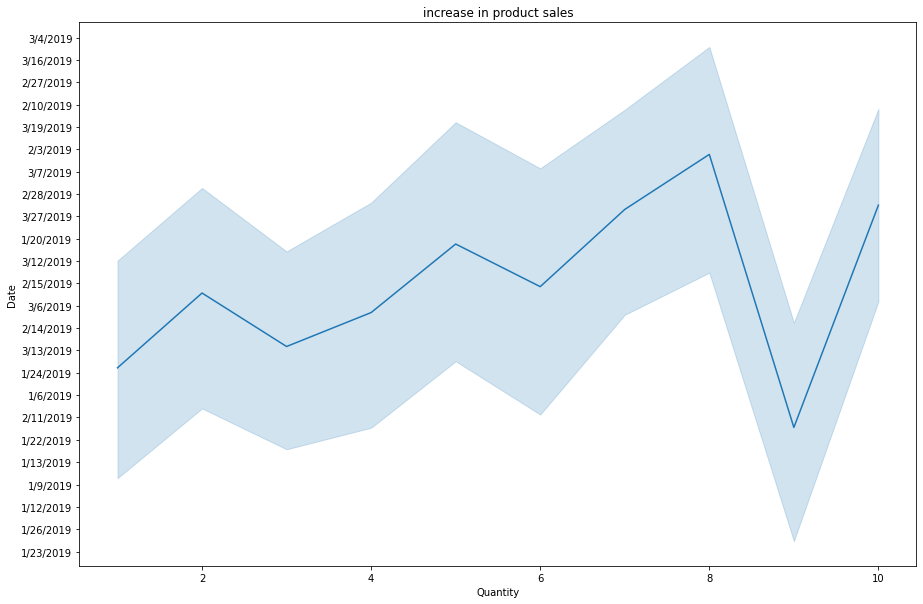

In [ ]:
fig = plt.figure(figsize=(15,10))
genderCount  = sns.lineplot(x="Quantity",  y ="Date", data =sales).set_title("increase in product sales")


In [ ]:
import plotly.graph_objects as go

#revenue = sales.groupby('Product line', as_index=False).agg({"gross income":"sum"})
#revenue.head()
labels = ['Electronic accessories', ['Fashion accessories'], ['Food and beverages'], ['Health and beauty'], ['Home and lifestyle']]
values = [2587.5015, 2585.9950, 2673.5640, 2342.5590, 2564.8530]
colors = ['Gold', 'Yellow', 'Red', 'MediumTurquoise', 'Blue']
fig = go.Figure(data=[go.Pie(labels=labels, values=values,marker_colors=colors)], layout_title_text="Revenue per Product")
fig.show()

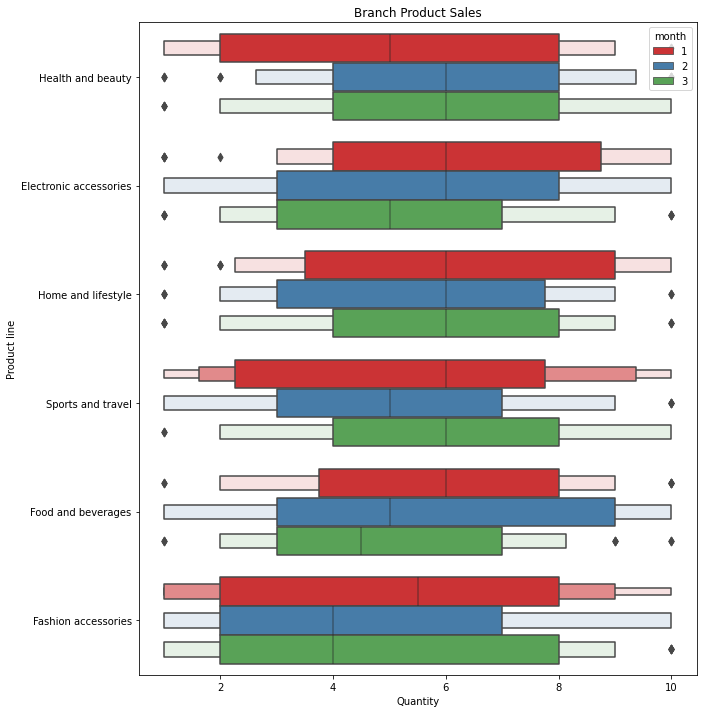

In [ ]:
ax, fig = plt.subplots(figsize = (10,12)) 
sns.boxenplot(y = 'Product line', x = 'Quantity', hue = 'month', data=sales, palette="Set1").set_title("Branch Product Sales")
plt.legend(loc = 'upper right', title = 'month')

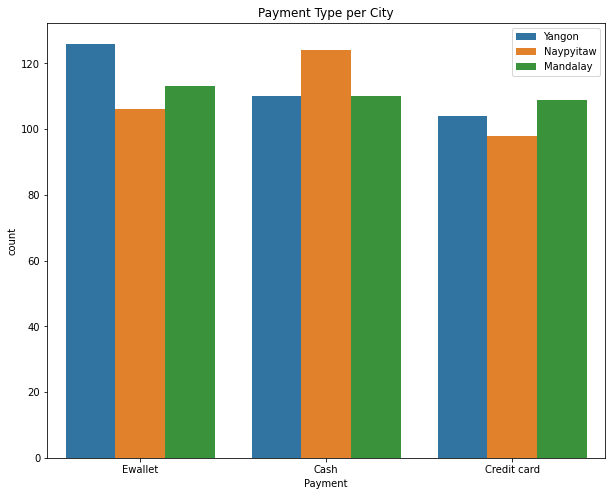

In [ ]:
ax, fig = plt.subplots(figsize = (10,8))

sns.countplot(x="Payment", hue = "City", data =sales).set_title("Payment Type per City")
plt.legend(loc = 'upper right')

In the supermarket sales dataset, providing historical data for purchasing an item for 3 months in a supermarket company that has 3 branches, it can be concluded:

1. In the number of purchases, it was found that there were 501 female customers (50.1%) and 499 male customers (49.9%) so that there were 2 different buyers. 
2. The branch that needs to increase sales is the Mandalay branch because the average information, min value, max value and rating value are smaller compared to the Yangon and Naypyitaw branches.
3.The sales trend of supermarket products experienced a loss on 3/7/2019
4. Income each month the highest results in food and beverage products.
5. Home Lifestyle products, at the end of the third month, there is a need for product stock innovation which needs to be added in January of the following year because of the distribution of products that have the highest average sales.
6. The type of payment used by customers in the city of Yangon Ewalet, city of Naypyitaw Cash payment, and city of Mandalay. credit card